In [1]:
import matplotlib.pyplot as plt
from PIL import Image

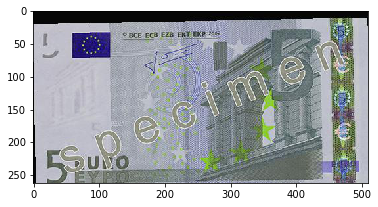

In [2]:
img_0 = Image.open('/resources/data/test_data_keras/5/0.jpeg')
plt.imshow(img_0)

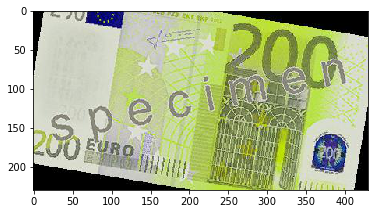

In [3]:
img_52 = Image.open('/resources/data/test_data_keras/200/52.jpeg')
plt.imshow(img_52)

In [4]:
import keras
from keras.layers import Dense
from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import load_model

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

In [5]:
import os
import pandas as pd
import numpy as np 
import random
from imageio import imread
from matplotlib.pyplot import imshow
from PIL import ImageDraw, ImageFont

In [6]:
CLASSES = ['5', '10', '20', '50', '100', '200', '500']

In [7]:
test_data_dir = '/resources/data/test_data_keras'

In [8]:
test_generator = ImageDataGenerator().flow_from_directory(test_data_dir
                                                           , target_size=(224, 224)
                                                           , batch_size=73
                                                           , classes=CLASSES
                                                           , seed=0
                                                           , shuffle=False)

Found 73 images belonging to 7 classes.


In [9]:
model = load_model("/resources/Proyectos/Rentadrone/vgg16_keras.pt")

In [ ]:
random.seed(0)
numbers = [random.randint(0, 72) for i in range(0, 10)]
print('Index image', numbers)
predict = model.predict_generator(test_generator, steps=len(test_generator))
predict_prob = list(np.expand_dims(predict, axis=0))
predict = list(np.argmax(predict, axis=1))
label_map = (test_generator.class_indices)
label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
predict = [label_map[k] for k in predict]

filenames = test_generator.filenames
classes = test_generator.class_indices


for i in numbers:
    x = int(filenames[i].split('/')[0])-int(predict[i])
    x = np.where(x == 0, '(Correctly-classified)', '(Mis-classified)')
    plt.imshow(test_generator.next()[0][i].astype(np.uint8))
    plt.xlabel('Pred: $'+predict[i]+' '+str(x)+ ' Prob:'+str(round((max(predict_prob[0][i])*100), 2)) +'%')
    plt.show()

Index image [49, 53, 5, 33, 65, 62, 51, 38, 61, 45]
